In [ ]:
from google.colab import drive
drive.mount('/googledrive')

Mounted at /googledrive


**Dataset Description**

- **User_ID**: Unique ID of the user.
- **Product_ID**: Unique ID of the product.
- **Gender**: Gender of the user.
- **Age**: Age range of the user.
- **Occupation**: Occupation code of the user.
- **City_Category**: Category of the city (A, B, C).
- **Stay_In_Current_City_Years**: Number of years the user has stayed in the current city.
- **Marital_Status**: Marital status of the user.
- **Product_Category_1**: Product category (1).
- **Product_Category_2**: Product category (2).
- **Product_Category_3**: Product category (3).
- **Purchase**: Purchase amount.

In [ ]:
# Dataset Description

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/googledrive/MyDrive/28-06-2024/BlackFridaySales.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.shape)

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [ ]:
#Basic Statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None
         

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**EDA (Exploratory Data Analysis)**

**1. Missing Values**

 identifying columns with missing values and their counts. This information is crucial for handling missing data in the preprocessing stage.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


**2. Distribution of Purchase Amount**

 histogram of the Purchase amount shows the distribution of purchase values across different transactions. This is used to understand the range and frequency of purchase amounts.

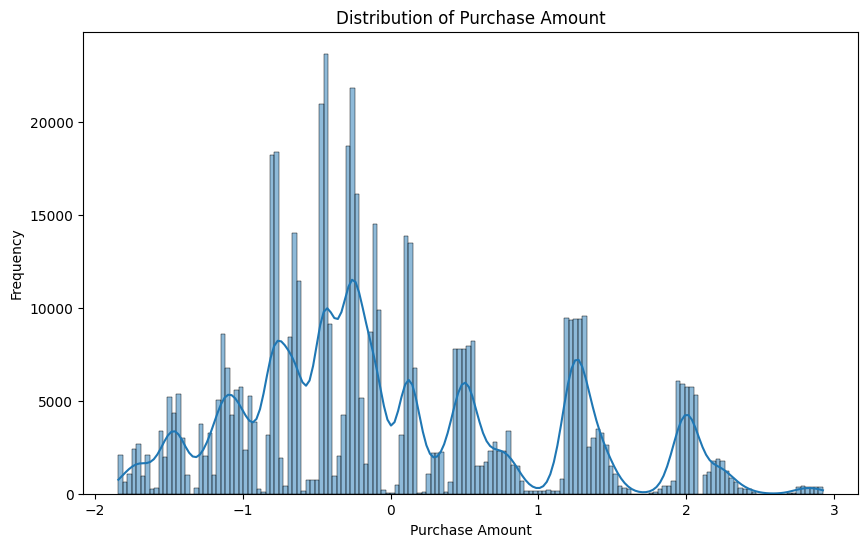

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

**2. Distributions of Product Categories**

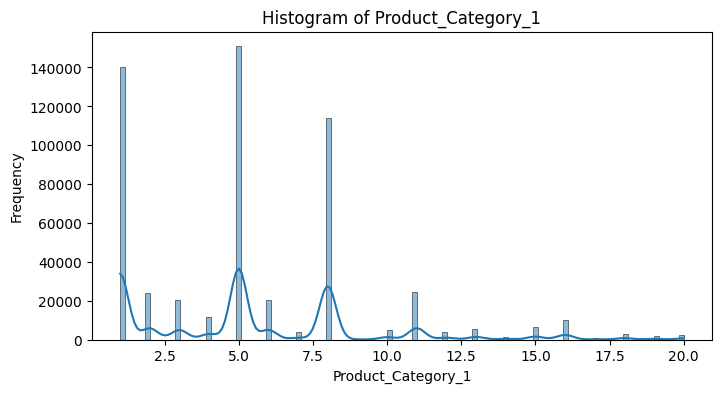

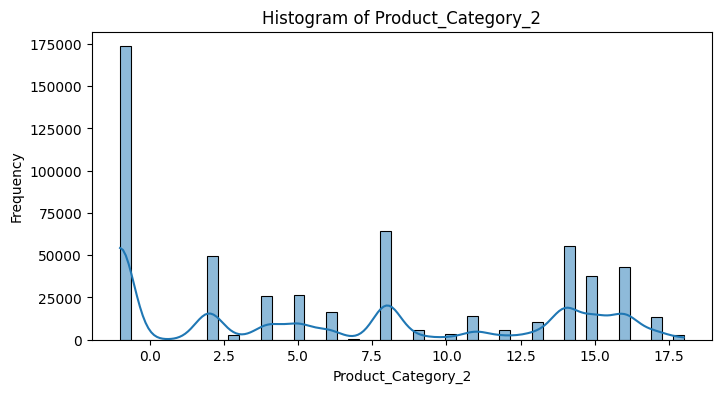

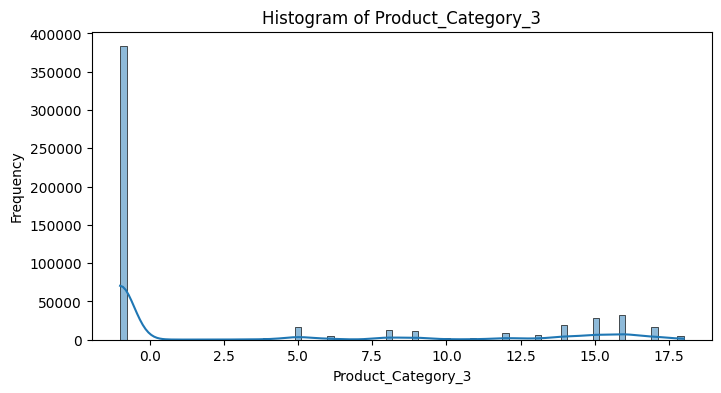

In [ ]:
# Function to plot histograms
def plot_histogram(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Columns to plot histograms for
columns_to_plot = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
plot_histogram(df, columns_to_plot)

**4. Gender Distribution**

count plot visualizes the distribution of genders in the dataset, and shows the proportion of male and female customers.

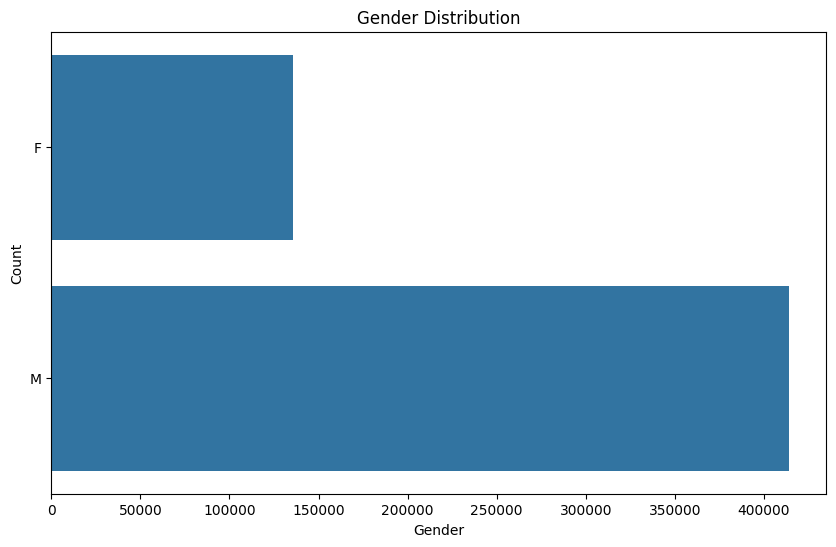

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**5. Age Distribution**

 count plot shows the distribution of different age groups among the customers, giving insights into which age groups are most common

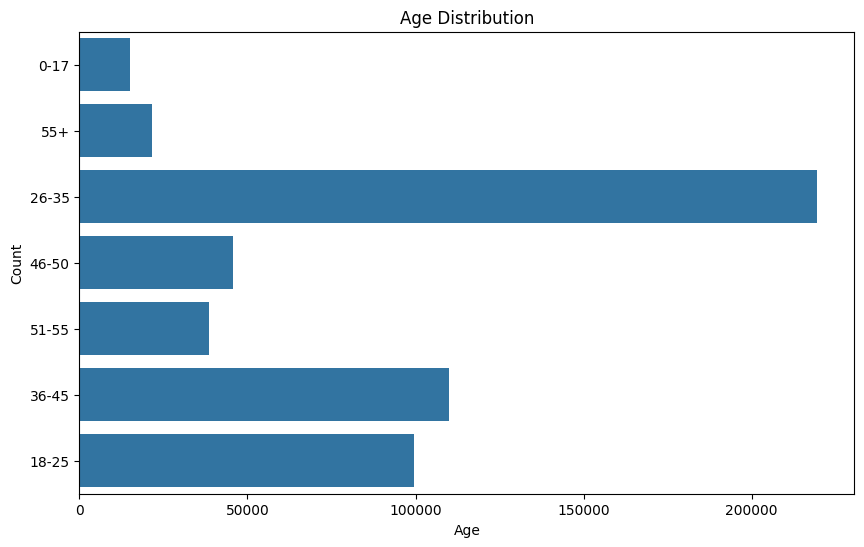

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**6. Purchase Amount by Age Group**

 box plot displays the spread and centers of purchase amounts across different age groups. It highlights the median, quartiles, and potential outliers for each age group.

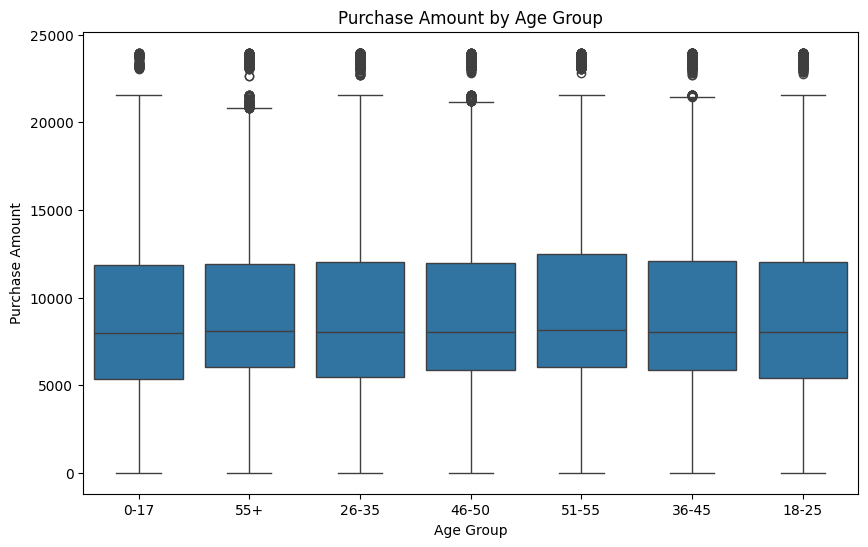

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=data)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

**7. Correlation Heatmap**

The correlation heatmap visualizes the relationships between different numerical features in the dataset. .

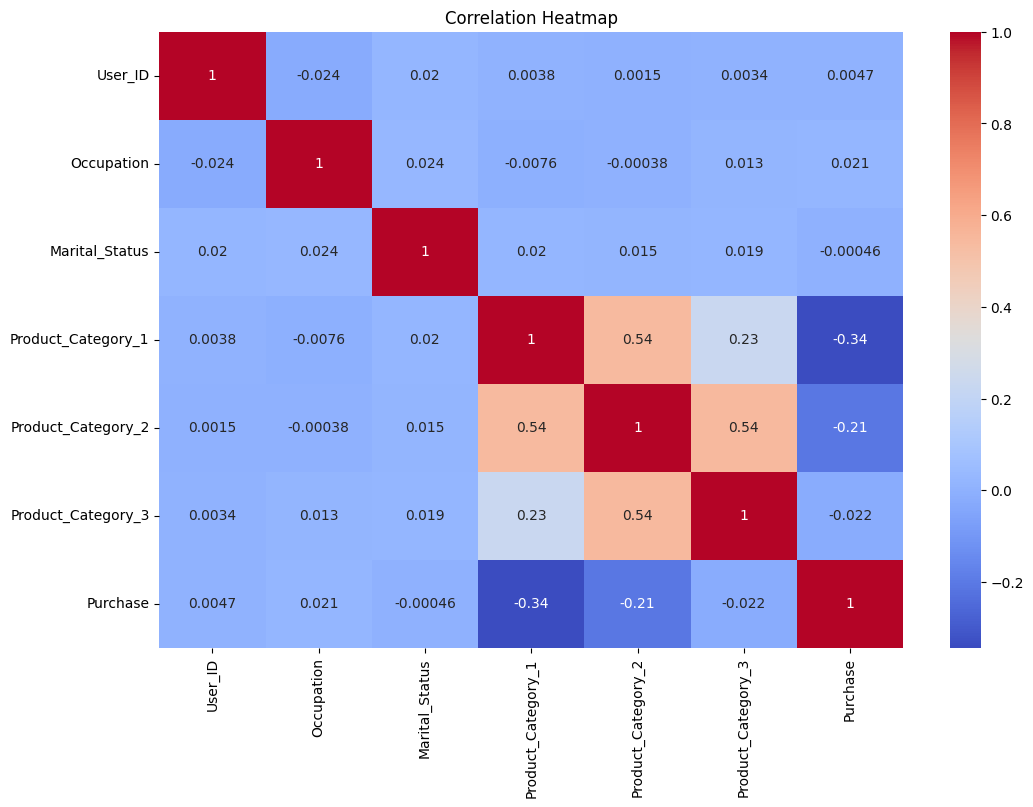

In [ ]:
# Drop non-numerical columns before calculating correlations
numerical_data = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Data Preprocessing**

**1. Handling Missing Values**

Missing values are filled with -1, which is a placeholder indicating that there was no data available for those entries.

In [ ]:
# Fill missing values with -1
df.fillna(-1, inplace=True)
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

**2. Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-1.0,-1.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-1.0,-1.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-1.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-1.0,-1.0,7969


**3. Dropping Irrelevant Columns**

In [ ]:
# Drop irrelevant columns
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,-1.0,-1.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,-1.0,-1.0,1422
3,0,0,10,0,2,0,12,14.0,-1.0,1057
4,1,6,16,2,4,0,8,-1.0,-1.0,7969


**4. Feature Scaling**

 'Purchase' column of the dataset, scaling is crucial for models like linear regression, logistic regression, and others.the 'Purchase' column values have been transformed to have a mean of 0 and a standard deviation of 1, which helps improve the performance and training stability of the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Purchase']] = scaler.fit_transform(df[['Purchase']])
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,-1.0,-1.0,-0.177973
1,0,0,10,0,2,0,1,6.0,14.0,1.181756
2,0,0,10,0,2,0,12,-1.0,-1.0,-1.561193
3,0,0,10,0,2,0,12,14.0,-1.0,-1.633858
4,1,6,16,2,4,0,8,-1.0,-1.0,-0.257805


**5. Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
178247,1,5,7,1,3,1,1,15.0,-1.0
196647,1,1,12,2,4,0,5,-1.0,-1.0
418590,1,2,5,1,1,0,8,14.0,17.0
408727,1,1,4,1,2,0,8,-1.0,-1.0
216416,1,1,4,1,1,0,1,8.0,-1.0


**Modeling Phase**

**1. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluation
lin_reg_mse = mean_squared_error(y_test, y_pred)
lin_reg_r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {lin_reg_mse:.4f}, R² Score: {lin_reg_r2:.4f}')


Linear Regression MSE: 0.8449, R² Score: 0.1516


**2. Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_dt_reg = dt_reg.predict(X_test)

# Evaluation
dt_mse = mean_squared_error(y_test, y_pred_dt_reg)
dt_r2 = r2_score(y_test, y_pred_dt_reg)
print(f'Decision Tree MSE: {dt_mse:.4f}, R² Score: {dt_r2:.4f}')


Decision Tree MSE: 0.4462, R² Score: 0.5520


**3. Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Evaluation
rf_mse = mean_squared_error(y_test,y_pred_rf_reg  )
rf_r2 = r2_score(y_test, y_pred_rf_reg )
print(f'Random Forest MSE: {rf_mse:.4f}, R² Score: {rf_r2:.4f}')

Random Forest MSE: 0.3716, R² Score: 0.6269


**4. Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train the model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_gb_reg = gb_reg.predict(X_test)


# Evaluation
gb_mse = mean_squared_error(y_test,y_pred_gb_reg )
gb_r2 = r2_score(y_test,y_pred_gb_reg)
print(f'Random Forest MSE: {gb_mse:.4f}, R² Score: {gb_r2:.4f}')

Random Forest MSE: 0.3567, R² Score: 0.6418


**5. XGBoost Regressor**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train the model
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb_reg = xgb_reg.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test,y_pred_xgb_reg )
xgb_r2 = r2_score(y_test,y_pred_xgb_reg)
print(f'XGBoost MSE: {xgb_mse:.4f}, R² Score: {xgb_r2:.4f}')


XGBoost MSE: 0.3305, R² Score: 0.6681


**Evaluation Metric**

The evaluation metric for our models is the Mean Squared Error (MSE) and R2 Score. Lower MSE and higher R2 Score indicate better model performance.

**Evaluation and Comparison**

 Among all models, the Gradient Boosting and XGBoost models performed the best in terms of both MSE and R² score.


Therefore, the Gradient Boosting and XGBoost models would be recommended for predicting the purchase amount in this dataset.However, XGBoost is the top choice due to its slightly better performance metrics.

In [ ]:
# Compare all models
results = {
    'Linear Regression': {'MSE': lin_reg_mse, 'R²': lin_reg_r2},
    'Decision Tree': {'MSE': dt_mse, 'R²': dt_r2},
    'Random Forest': {'MSE': rf_mse, 'R²': rf_r2},
    'Gradient Boosting': {'MSE': gb_mse, 'R²': gb_r2},
    'XGBoost': {'MSE': xgb_mse, 'R²': xgb_r2}
}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        MSE        R²
Linear Regression  0.844855  0.151616
Decision Tree      0.446181  0.551956
Random Forest      0.371585  0.626862
Gradient Boosting  0.356683  0.641827
XGBoost            0.330470  0.668149


**Conclusion**

However, XGBoost is the top choice due to its slightly better performance metrics because Even small improvements in accuracy can be significant in the field of machine learning, depending on the purpose. XGBOOST Regressor was the best performer with MSE of 0.330470 and R² score of 0.668149.

 XGBoost has shown superior performance in predicting purchase amounts based on customer demographics and product details, making it ideal for tailoring personalized offers that maximize customer engagement and satisfaction.

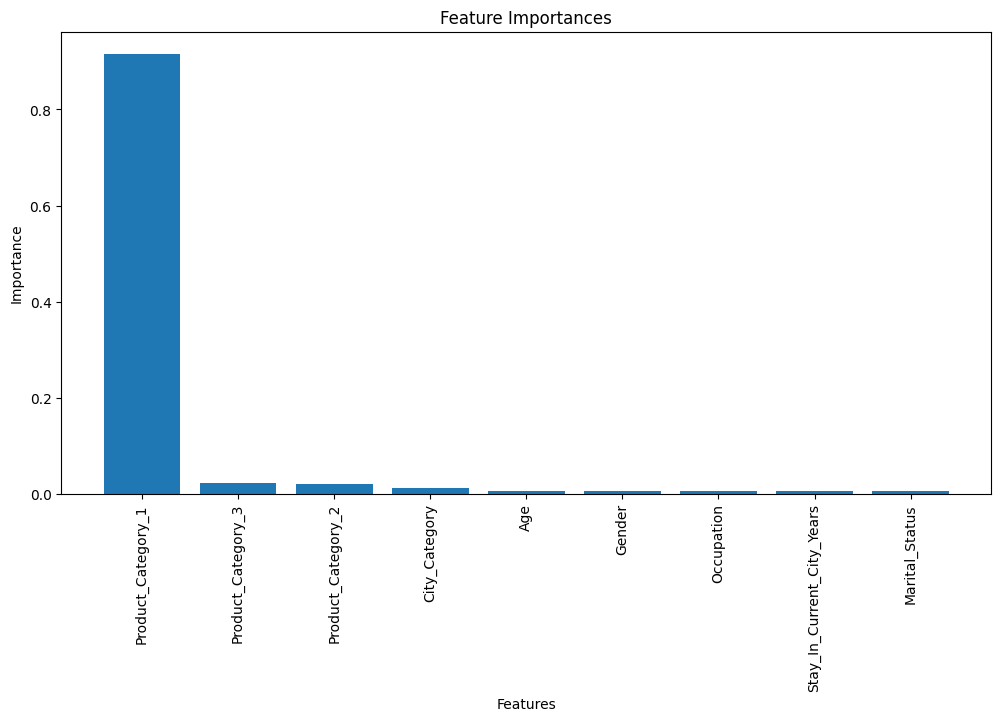

In [ ]:
import numpy as np

# Plotting the feature importances
def plot_feature_importances(model, X):
    feature_importances = model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    sorted_importances = feature_importances[sorted_idx]
    sorted_features = X.columns[sorted_idx]

    plt.figure(figsize=(12, 6))
    plt.bar(range(X.shape[1]), sorted_importances, align='center')
    plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importances(xgb_reg, X)

In [ ]:
# Print the first few predicted results alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb_reg})
print(predictions.head())


          Actual  Predicted
84432   1.966536   1.164678
72724   1.244068   0.970880
197032 -0.291051  -0.506893
353704  1.232522   0.878746
91198  -0.950012   1.285980
